In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras import datasets
import tensorflow.keras as K
import tensorflow as tf

In [2]:
def preprocess_data(X, y):
        X = X.astype('float32')
        # here i used the preprocess_input function from VGG16 to normalize the input data
        preprocessed_X = preprocess_input(X)
        # Transforming labels to correct format
        preprocessed_y = to_categorical(y, 10)
        return (preprocessed_X, preprocessed_y)

if __name__ == "__main__":
    #load data
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    # preprocessing the data (train & test data)
    (X_train , y_train) = preprocess_data(X_train, y_train)
    (X_test , y_test) = preprocess_data(X_test, y_test)

    # Loading VGG16 model
    vgg16_model = VGG16(include_top=False,
                       weights='imagenet',
                       pooling='avg')
    
    model= K.Sequential()
    model.add(K.layers.UpSampling2D())
    model.add(vgg16_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.Dense(512, activation=('relu'))) 
    model.add(K.layers.Dropout(0.2))
    model.add(K.layers.Dense(256, activation=('relu')))
    model.add(K.layers.Dropout(0.2))
    model.add(K.layers.Dense(10, activation=('softmax')))
    callback = []
    def decay(epoch):
        return 0.001 / (1 + 1 * 30)
    callback += [K.callbacks.LearningRateScheduler(decay, verbose=1)]
    callback += [K.callbacks.ModelCheckpoint('cifar10.h5',
                                             save_best_only=True,
                                             mode='min'
                                             )]
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train , y_train,
              batch_size = 128,
              validation_data=(X_test , y_test),
              epochs=100, shuffle=True,
              callbacks=callback,
              verbose=1)


Epoch 00001: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 1/100
391/391 [==============================] - 132s 317ms/step - loss: 1.3363 - accuracy: 0.5543 - val_loss: 0.5754 - val_accuracy: 0.8133 - lr: 3.2258e-05

Epoch 00002: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 2/100
391/391 [==============================] - 119s 305ms/step - loss: 0.5169 - accuracy: 0.8346 - val_loss: 0.4046 - val_accuracy: 0.8671 - lr: 3.2258e-05

Epoch 00003: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 3/100
391/391 [==============================] - 120s 306ms/step - loss: 0.3355 - accuracy: 0.8933 - val_loss: 0.3608 - val_accuracy: 0.8854 - lr: 3.2258e-05

Epoch 00004: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 4/100
391/391 [==============================] - 122s 313ms/step - loss: 0.2320 - accuracy: 0.9249 - val_loss: 0.4022 - val_accuracy: 0.8791 - lr: 3.2258e-05

Epo

In [3]:
test_loss, test_acc = model.evaluate(X_test , y_test, verbose=1)
print("test_loss = ", test_loss)
print("test_acc = ", test_acc)

313/313 [==============================] - 12s 34ms/step - loss: 0.4388 - accuracy: 0.9255
test_loss =  0.43878746032714844
test_acc =  0.9254999756813049


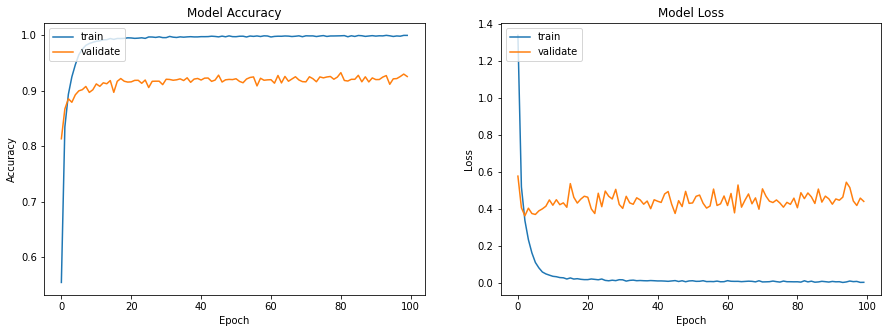

In [4]:
import matplotlib.pyplot as plt
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(history)

In [2]:
from tensorflow.keras import models
#models.save_model(model,'VGG16_model.hdf5')

VGG16_model = models.load_model('./VGG16_model.hdf5')